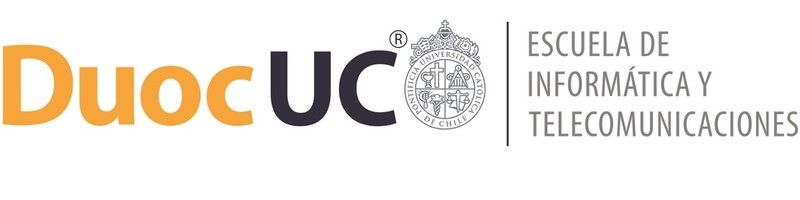

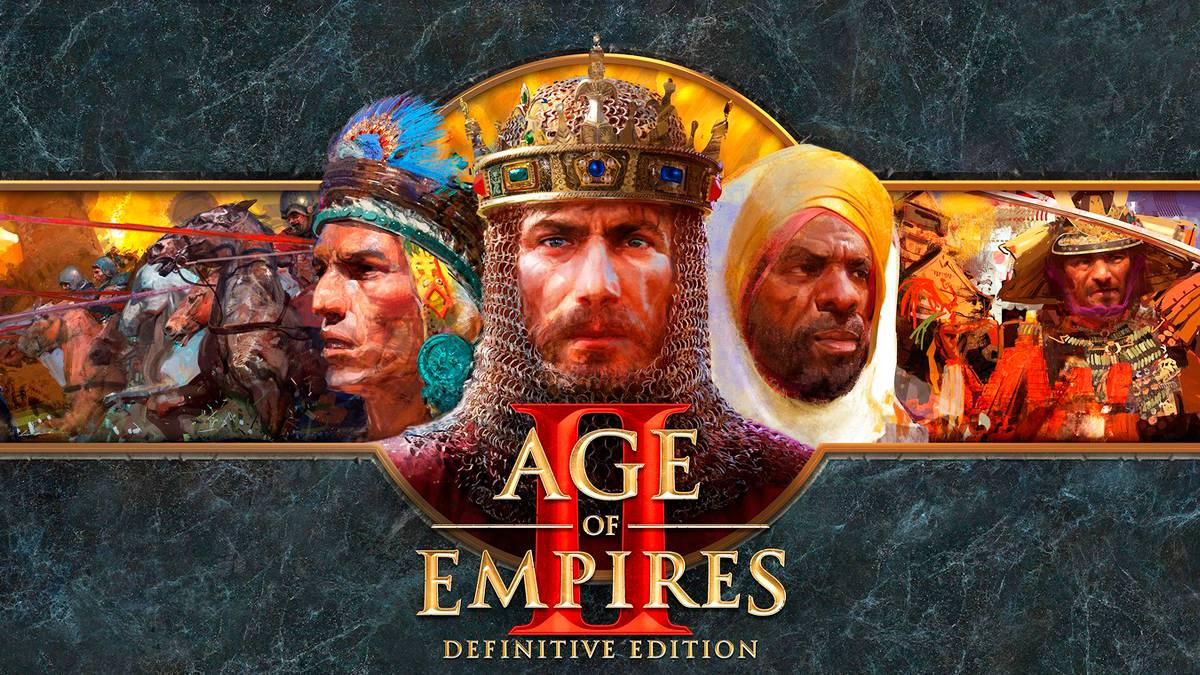

# Informe Técnico - Dataset de Age of Empires II


Integrante: Jonathan Huala

Docente: Giocrisrai Godoy

Sección: MLY0100 - 002D

# Caso de Machine Learning

CONTEXTO CASO

Se analizará una Database del juego Age of Empires 2 para poder identificar diversas inquietudes y validarlas con los datos que se encuentran en esta, tales como si existen relaciones entre la victoria de una civilización entre otra en específico, ésto se hará verificando datos competitivos del mismo juego y logrando diferenciar si hay alguna que tenga mayor ventaja o sea un "Counter" directo de otra. Se espera obtener los resultados por rangos del Ranking de  los jugadores para identificar si se pueden seguir viendo eso entre otros rangos de jugadores y si hay una civilización con mayor porcentaje de ser jugada a diferencia del resto.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Token & \text {ID único de cada fila}  \\
\hline \text{ Match } & \text { ID de cada partida } \\
\hline \text{ Rating } & \text { Rango al que pertenece el jugador al momento de jugarse la partida } \\
\hline \text{ Color } & \text { Color que el jugador eligió en la partida } \\
\hline \text{ Civ } & \text { Civilización que el jugador eligió en la partida } \\
\hline \text{ Team } & \text { Equipo del jugador } \\
\hline \text{ Winner } & \text { Indica si el jugador ganó o no la partida } \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

# **Preguntas**

¿Qué civilización es la más jugada?

¿Hay alguna civilización que sea Counter de otra civilización? (Justificación: Clasificaremos como Counter que una civilización que sea jugada contra otra tenga un mayor winrate que la otra)

¿En los distintos rangos cambian los winrates de las civilizaciones?

# **Hipótesis**

En este informe trabajaremos un máximo de tres hipótesis, la primera es que entre una y tres civilizaciones son las que más se juegan en general, entre todos los datos.

La segunda es que hay más de tres civilizaciones que tienen un mayor winrate contra otra civilización, por lo que sería un counter directo contra esta.

Y para finalizar que entre los diferentes rangos las civilizaciones tendrán una mayor o peor probabilidad de ganar contra su counter, a lo que queremos llegar es que entre los rangos 1000 y los 2000 los winrates de las civilizaciones no serán los mismos.

# **Criterios de aceptación**

Para aceptar las hipótesis planteadas deben ocurrir los siguientes criterios (Serán enumerados por las hipótesis de este modo: 1. Civilización más jugada - 2. Civilización con counter - 3. Distintos winrates para civilizaciones dependiendo de rangos)

1.- Deberá haber una diferencia (Mínimo un 4%) entre unas civilizaciones a otras (Máximo 3 civilizaciones a diferencia del resto)

2.- Unas civilizaciones (Al menos 2) deben tener un mayor winrate (Al menos un 10% más) en partidas contra otra (Tener al menos un 60% de winrate contra otra civilización). (No es necesario que sean contra la misma, mientras sea contra otra civilización que no sea la evaluada se contará como si fuera un counter)

3.- Los winrate cambiarán (Al menos un 10% de diferencia) entre los distintos Rantings (Los ratings deben tener una diferencia de 800 más o menos).

## Fase 2: Data Understanding

## Importaciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Lectura del archivo

Se realiza la importación del archivo saltando las filas que tengan errores, esto dando 9.732.500 de filas aproximadamente

*Aclaración: Puede que muchos datos sean menores, esto se debe a que el detaset es muy grande y no está totalmente actualizado, por lo que al cargar los datos pueden ocurrir errores al cargar filas

In [2]:
aoe = pd.read_csv('match_players.csv', on_bad_lines='skip')
aoe

,token,match,rating,color,civ,team,winner
0,rFWxLAdY6TF78xlo,axps4XstiBOmrDeG,1565.0,Red,Chinese,1,False
1,zsyvxRyzLh85YIba,axps4XstiBOmrDeG,1600.0,Blue,Goths,2,True
2,CHrJISNtjKDKM114,uQdosqwC7uiQ78ya,2145.0,Orange,Incas,1,False
3,X147inwVdQuaegxT,uQdosqwC7uiQ78ya,2124.0,Green,Tatars,2,True
4,kNckdaCe6pjKm6Au,uQdosqwC7uiQ78ya,2105.0,Red,Magyars,1,False
...,...,...,...,...,...,...,...
9732495,RAUSAMAC1Y23giS0,6UKYvPeVo9Fj0a9X,1093.0,Blue,Lithuanians,2,False
9732496,3T6Wd6AfWjkeAY9D,dLVzMIoR9tRPCsMt,1111.0,Red,Berbers,1,True
9732497,dYutMIrm0Asa8E2v,dLVzMIoR9tRPCsMt,1124.0,Blue,Ethiopians,2,False
9732498,9C8tY2D2STKtqPAQ,Twm8bklVwkEGYjFd,1152.0,Red,Malians,1,False


## Exploración de datos

Identificar que tipos de datos estamos trabajando para saber cómo manejarlos

In [3]:
print(aoe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9732500 entries, 0 to 9732499
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   token   object 
 1   match   object 
 2   rating  float64
 3   color   object 
 4   civ     object 
 5   team    int64  
 6   winner  bool   
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 454.8+ MB
None


Identificación de filas con valores nulos

In [4]:
valores_nulos = aoe.isnull().any(axis=1)

print("Filas con valores nulos:")
print(aoe[valores_nulos])

Filas con valores nulos:
                    token             match  rating   color     civ  team  \
120      spacWUMyisaiQWbI  oUsF7ZFMF0ykgCHm     NaN     Red   Celts     1   
289      PLQJ3MtJgZwNEOf4  N6Hei3RaxUw0Ij2e     NaN  Yellow    Huns     2   
336      u3UVup3DX9ng1ktx  L5IlyPsOnDJcfqL6     NaN  Orange   Celts     1   
344      agqEXgU4ClQx3zdW  zNv6NyWyaax5qACt     NaN  Yellow  Mayans     1   
435      j9DHxfJcpMyAfhY2  em7f5lJ0KaD36W8a     NaN    Blue  Franks     2   
...                   ...               ...     ...     ...     ...   ...   
9732379  Cf4aSZxdbVzp4Ft3  uDKEUk7gdPavqbXN     NaN    Blue  Mayans     2   
9732384  2Cp1aL6LEqNNqoxe  gkpSpGvhKiuMatVN     NaN     Red  Franks     1   
9732392  eRcDWd1qLOojDwXr  hP78DqcG1wc8PEmq     NaN     Red   Celts     1   
9732436  20ZjKQJpiUfXqz53  o8Sz0luvC1LIKjAB     NaN     Red   Turks     1   
9732490  UC3hWoryHRmNkFfk  BNCq0COCzubtChjS     NaN     Red  Franks     1   

         winner  
120        True  
289        Tru

Los datos nulos son un aproximado de 503.445, que sería un 19,33% aproximadamente.

## *Se completarán y/o eliminaran los datos nulos en la fase 3*, pero antes de eso se debe sacar el promedio de rating por cada match para llenar el valor de esas filas faltantes [Fase 3]

Antes de sacar el promedio se deben pasar los datos de rating a entero, esto se hará en la fase 3 ("RATING A ENTERO")

In [6]:
promedio_rating_match = aoe.groupby('match')['rating'].mean()

*Luego de esto se llenarán los datos nulos (Llenado de datos nulos) [Fase 3]

## VERIFICAR VALORES NULOS RATING

In [9]:
print(aoe['rating'].isnull().sum())

0


## Crear una nueva partición, eliminar filas con valores nulos en Match y examinar las filas con valores nulos restantes

*Esto se hace por si a futuro se pueden llenar los datos de la columna Match ocupando un modelo de regresión o clasificación.

In [10]:
aoe_2 = aoe.dropna(subset=['match'])

print(aoe_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9732500 entries, 0 to 9732499
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   token   object 
 1   match   object 
 2   rating  float64
 3   color   object 
 4   civ     object 
 5   team    int64  
 6   winner  bool   
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 454.8+ MB
None


Ahora identificar si contiene datos nulos en alguna fila y cuantas filas tienen nuestros datos

In [11]:
aoe_2

,token,match,rating,color,civ,team,winner
0,rFWxLAdY6TF78xlo,axps4XstiBOmrDeG,1565.0,Red,Chinese,1,False
1,zsyvxRyzLh85YIba,axps4XstiBOmrDeG,1600.0,Blue,Goths,2,True
2,CHrJISNtjKDKM114,uQdosqwC7uiQ78ya,2145.0,Orange,Incas,1,False
3,X147inwVdQuaegxT,uQdosqwC7uiQ78ya,2124.0,Green,Tatars,2,True
4,kNckdaCe6pjKm6Au,uQdosqwC7uiQ78ya,2105.0,Red,Magyars,1,False
...,...,...,...,...,...,...,...
9732495,RAUSAMAC1Y23giS0,6UKYvPeVo9Fj0a9X,1093.0,Blue,Lithuanians,2,False
9732496,3T6Wd6AfWjkeAY9D,dLVzMIoR9tRPCsMt,1111.0,Red,Berbers,1,True
9732497,dYutMIrm0Asa8E2v,dLVzMIoR9tRPCsMt,1124.0,Blue,Ethiopians,2,False
9732498,9C8tY2D2STKtqPAQ,Twm8bklVwkEGYjFd,1152.0,Red,Malians,1,False


In [12]:
filas_con_nulos = aoe_2[aoe_2.isnull().any(axis=1)]

print("Filas con datos nulos en 'aoe_2':")
print(filas_con_nulos)

Filas con datos nulos en 'aoe_2':
                    token             match  rating color     civ  team  \
2516081  ugTmJlyQ4h46qIin  f8049f6242ef95b1   913.0   NaN  Aztecs     1   

         winner  
2516081   False  


*Los datos nulos son el 0.002% aproximadamente de los datos totales y son dificilmente recuperables ya que tienen 2 o más datos NaN o datos NaN que no tienen relación con el resto, por lo cual se eliminarán de los datos que ocuparemos. [Esto se hará en la fase 3 (Eliminación de los otros NaN)] [Fase 3]

## ÚLTIMA VERIFICACIÓN NULOS

In [14]:
print(aoe_2[aoe_2.isnull().any(axis=1)])

Empty DataFrame
Columns: [token, match, rating, color, civ, team, winner]
Index: []


*Ahora que todos los valores nulos fueron eliminados podremos trabajar en nuestro dataset

## Exploración de datos en la columna de Rating

*Se realizará una exploración de los datos de la columna Rating, ya que estos serán ocupados para verificar si cambia el uso de las civilización en los diferentes Ratings y verificar sus winrates.

In [15]:
print(aoe_2['rating'].describe())

count    9.732499e+06
mean     1.377557e+03
std      4.167229e+02
min      4.000000e+00
25%      1.073000e+03
50%      1.299000e+03
75%      1.597000e+03
max      3.231000e+03
Name: rating, dtype: float64


Aquí podemos identificar unas anomalías, ya que el mínimo que se muestra en el rating es muy bajo y el máximo es mucho más alto que la media, esto se analizará más a profundidad en el boxplot para identificar los valores atipicos.

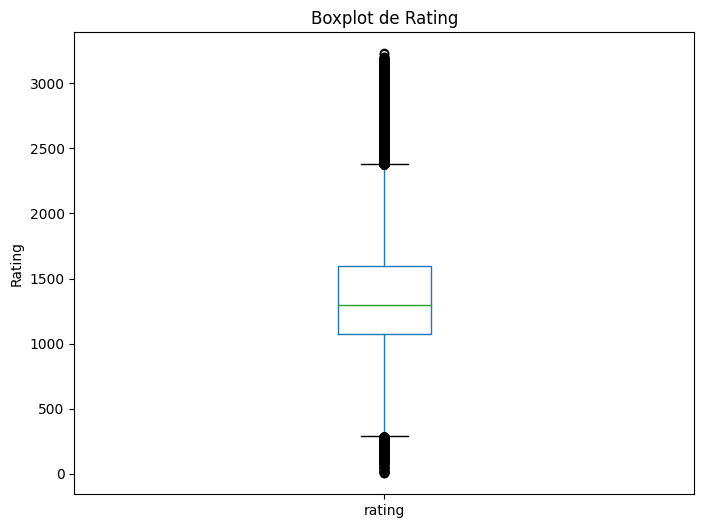

In [16]:
plt.figure(figsize=(8, 6))
aoe_2.boxplot(column='rating')
plt.title('Boxplot de Rating')
plt.ylabel('Rating')
plt.grid(False)
plt.show()

Como se especificó en la exploración de rating con los datos estadísticos se puede ver la gran anormalidad de los datos mencionados, estos datos atipicos se deberían eliminar ya que pueden ser errores los cuales puedan afectar el resto de datos.

Aquí sacaremos los cuartiles y el rango intercuartil para luego realizar una limpieza de los outliers, también se realizará otra partición por temas de seguridad.

In [17]:
Q1_rating = aoe_2['rating'].quantile(0.25)
Q3_rating = aoe_2['rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating

lower_bound_rating = Q1_rating - 1.5 * IQR_rating
upper_bound_rating = Q3_rating + 1.5 * IQR_rating

aoe_2_sin_outliers = aoe_2[(aoe_2['rating'] >= lower_bound_rating) & (aoe_2['rating'] <= upper_bound_rating)]

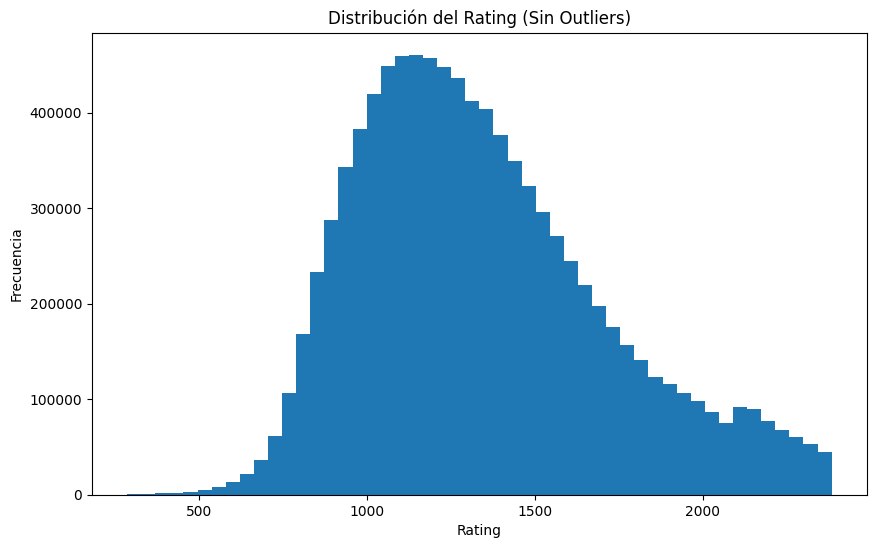

In [18]:
plt.figure(figsize=(10, 6))
aoe_2_sin_outliers['rating'].hist(bins=50)
plt.title('Distribución del Rating (Sin Outliers)')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

*Como se puede apreciar los datos se encuentran más concentrados para el manejo de estos, los datos que podemos manejar luego de eliminar los outliers.

Verificamos si los datos en Winner es True o False

In [19]:
valores_unicos = aoe_2_sin_outliers['winner'].unique()
print("Valores únicos en la columna 'winner':")
print(valores_unicos)

Valores únicos en la columna 'winner':
[False  True]


*Ahora trabajaremos con la columna win, la transformaremos a enteros [True=1, False=0] para poder manejar el winrate, el cual es el porcentaje de que ocurra una victoria o una derrota, éste se encuentra entre 0 y 100.* (TRANSFORMACIÓN DE WINNER) [Fase 3]

## ¿Qué civilización es la más jugada?

Para responder esa pregunta realizaremos el conteo de cada civilización y luego lo graficaremos.

In [21]:
conteo_de_civilizaciones = aoe_2_sin_outliers['civ'].value_counts()

Gráfico de las civilizaciones y el uso de éstas en el dataset

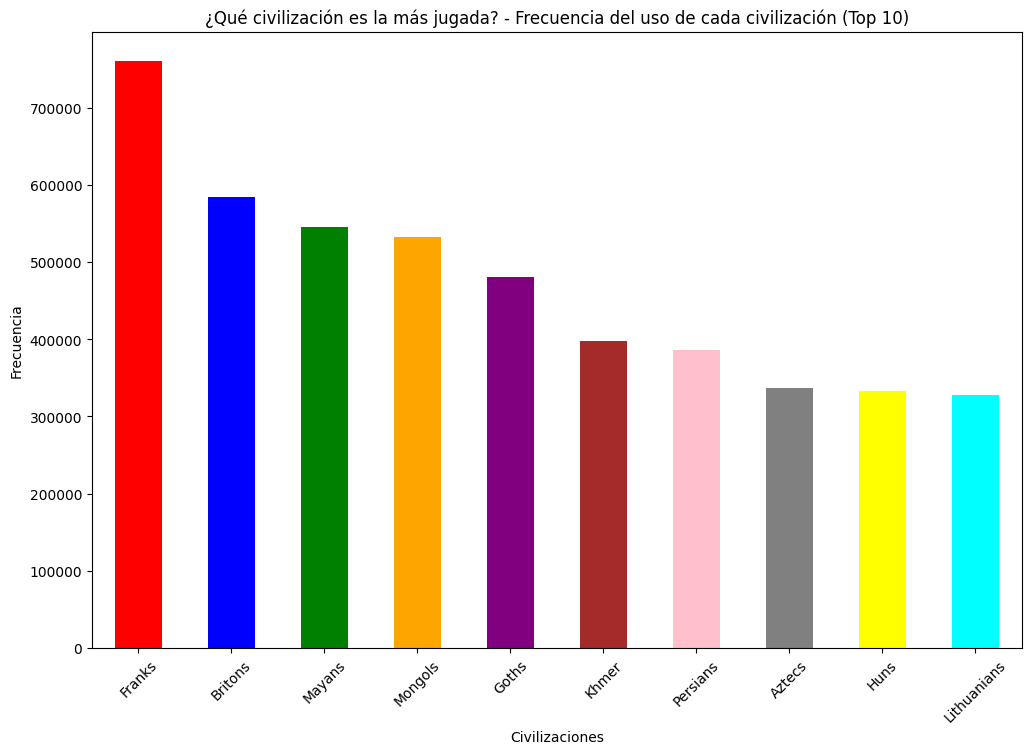

In [22]:
plt.figure(figsize=(12, 8))

top_10_civilizaciones = conteo_de_civilizaciones.head(10)
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan']
top_10_civilizaciones.plot(kind='bar', color=colores)

plt.title('¿Qué civilización es la más jugada? - Frecuencia del uso de cada civilización (Top 10)')
plt.xlabel('Civilizaciones')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Calculo de la diferencia entre la primera civilización más jugada y la segunda.

In [23]:
franks_britons = aoe_2_sin_outliers[aoe_2_sin_outliers['civ'].isin(['Franks', 'Britons'])]


conteo_franks_britons = franks_britons['civ'].value_counts()


diferencia_conteo = conteo_franks_britons['Franks'] - conteo_franks_britons['Britons']
porcentaje_diferencia = (diferencia_conteo / conteo_franks_britons['Franks']) * 100

print(f"Diferencia entre la primera civilización más jugada y la segunda: {porcentaje_diferencia:.2f}% ({diferencia_conteo} partidas)")


Diferencia entre la primera civilización más jugada y la segunda: 23.12% (175686 partidas)


**Viendo el gráfico y los datos obtenidos hay una gran diferencia entra las dos civilizaciones, se podría decir que la primera hipótesis es correcta, la diferencia entre la primera y la segunda es del 23.12%, lo cual hace a los 'Franks' la civilización más jugada y si hay una civilización más jugada**





## ¿Hay alguna civilización que sea Counter de otra civilización?

Colores que se usarán para los gráficos

In [97]:
colores_civilizaciones = {
    'Franks': 'red',
    'Britons': 'blue',
    'Mayans': 'green',
    'Mongols': 'orange',
    'Goths': 'purple',
    'Khmer': 'brown',
    'Persians': 'pink',
    'Aztecs': 'gray',
    'Huns': 'yellow',
    'Lithuanians': 'cyan',
    'Indians': 'pink',
    'Malians': 'black',
    'Slavs': 'slateblue',
    'Incas': 'coral',
    'Magyars': 'orchid',
    'Koreans': 'mistyrose',
    'Teutons': 'lime',
    'Portuguese': 'steelblue',
    'Berbers': 'darkseagreen',
  }

Para comenzar a resolver esta pregunta se realizará un conteo de los matches, al igual que se dejarán los matches donde solo hay dos jugadores, ya que si hay uno solo o más de dos no se podrá validar un counter directo contra otra civilización, ya que pueden influir más factores o si en la partida es una persona ningúna otra civilización sería evaluada, luego de dejar solo esos datos se hará una partición donde solo quedarán los datos válidos para responder esta pregunta

In [69]:
conteo_matches = aoe_2_sin_outliers['match'].value_counts()

matches_validos = conteo_matches[conteo_matches == 2].index

aoe_2_h2 = aoe_2_sin_outliers[aoe_2_sin_outliers['match'].isin(matches_validos)]

A continuación se realizarán varios pasos para poder pasar a la respuesta de la pregunta, primero se ordenará el dataframe por match y luego por winner, luego se filtrarán los datos, luego se crearán las columnas civilización_win y civilización_lose, luego se realiza una unión entre las columnas match, promedio_rating (Promedio del rating de la partida), civilización_win y civilización_lose y se reenombran. Esta partición de los datos se realiza para poder trabajar con la columna match, la civilización que perdió la partida y la que ganó, para poder sacar un conteo de partidas ganadas contra cada civilización y obtener un winrate contra cada una.

*Aclaración: Éste código dura 4min aproximadamente y uno realizado con anterioridad tardaba en ejecutarse y dar los resultados 48min.

In [70]:
aoe_2_h2_sorted = aoe_2_h2.sort_values(by=['match', 'winner'])
matches_filtrados2 = aoe_2_h2_sorted.groupby('match').filter(lambda x: len(x) == 2 and set(x['winner']) == {0, 1})

civilizacion_win = matches_filtrados2.loc[matches_filtrados2['winner'] == 1, ['match', 'civ']]
civilizacion_lose = matches_filtrados2.loc[matches_filtrados2['winner'] == 0, ['match', 'civ']]

promedio_rating = matches_filtrados2.groupby('match')['rating'].mean().reset_index()

particion_final = pd.merge(civilizacion_win, civilizacion_lose, on='match', suffixes=('_win', '_lose'))
particion_final = pd.merge(particion_final, promedio_rating, on='match')
particion_final.columns = ['match', 'civilizacion_win', 'civilizacion_lose', 'promedio_rating']

Para continuar y ya finalizando se realizará un conteo de las victorias, derrotas y la diferencia entre éstas para cada combate entre civilizaciones, para así poder obtener un resultado a que hay un counter para cada civilización.

Se crea una lista para almacenar los resultados finales y se obtienen todas las combinaciones únicas de cada civilizaciones, luego con cíclicos y condicionales se realiza una exploración por todos los datos para calcular las victorias y derrotas contra cada oponentes, ésto se realiza con dos ciclos for y un if, donde primero se calculan las victorias de cada civilización contra su oponente y las derrotas del mismo, luego se calcula la diferencia entre las victorias y derrotas y se agregan los resultados a la lista creada al comienzo.

Al finalizar el ciclo for principal se transforma la lista en un dataframe y se ordenan de forma descendente en la columna diferencia.

*Aclaración: Éste código tarda en ejecutarse aproximadamente 15min

In [26]:
resultados_finales = []
civilizaciones = pd.concat([particion_final['civilizacion_win'], particion_final['civilizacion_lose']]).unique()

for civ in civilizaciones:
    for oponente in civilizaciones:
        if civ != oponente:
            victorias = particion_final[
                (particion_final['civilizacion_win'] == civ) & (particion_final['civilizacion_lose'] == oponente)
            ].shape[0]
            derrotas = particion_final[
                (particion_final['civilizacion_win'] == oponente) & (particion_final['civilizacion_lose'] == civ)
            ].shape[0]
            diferencia = victorias - derrotas
            resultados_finales.append({
                'civilizacion': civ,
                'oponente': oponente,
                'victorias': victorias,
                'derrotas': derrotas,
                'diferencia': diferencia
            })

resultados_finales_df = pd.DataFrame(resultados_finales)
resultados_finales_df = resultados_finales_df.sort_values(by=['diferencia'], ascending=False)

Ahora pasaremos a mostrar el gráfico sobre la diferencias entre las victorias y las derrotas entre las civilizaciones, siendo la primera la que tiene la victoria y la segunda que se muestra teniendo la derrota. para esto se ocuparán 10 datos para mostrar los más relevantes y poder leer las civilizaciones correctamente

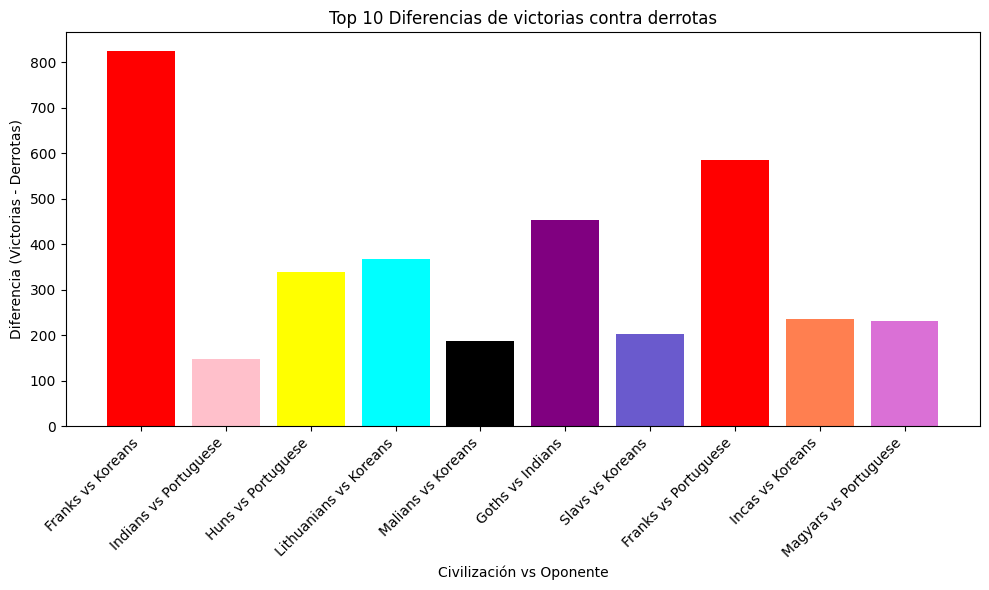

In [60]:
colores_barras = top_50_resultados['civilizacion'].map(colores_civilizaciones)
plt.figure(figsize=(10, 6))
plt.bar(top_50_resultados['civilizacion'] + " vs " + top_50_resultados['oponente'],
        top_50_resultados['diferencia'], color=colores_barras)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Civilización vs Oponente')
plt.ylabel('Diferencia (Victorias - Derrotas)')
plt.title('Top 10 Diferencias de victorias contra derrotas')
plt.tight_layout()
plt.show()


Para finalizar sacaremos el winrate y lo graficaremos, para saber que tanta probabilidad tendrá de ganar cada civilización que se enfrente a otra entre los 10 mejores y los 10 peores enfrentamientos entre civilizaciones.

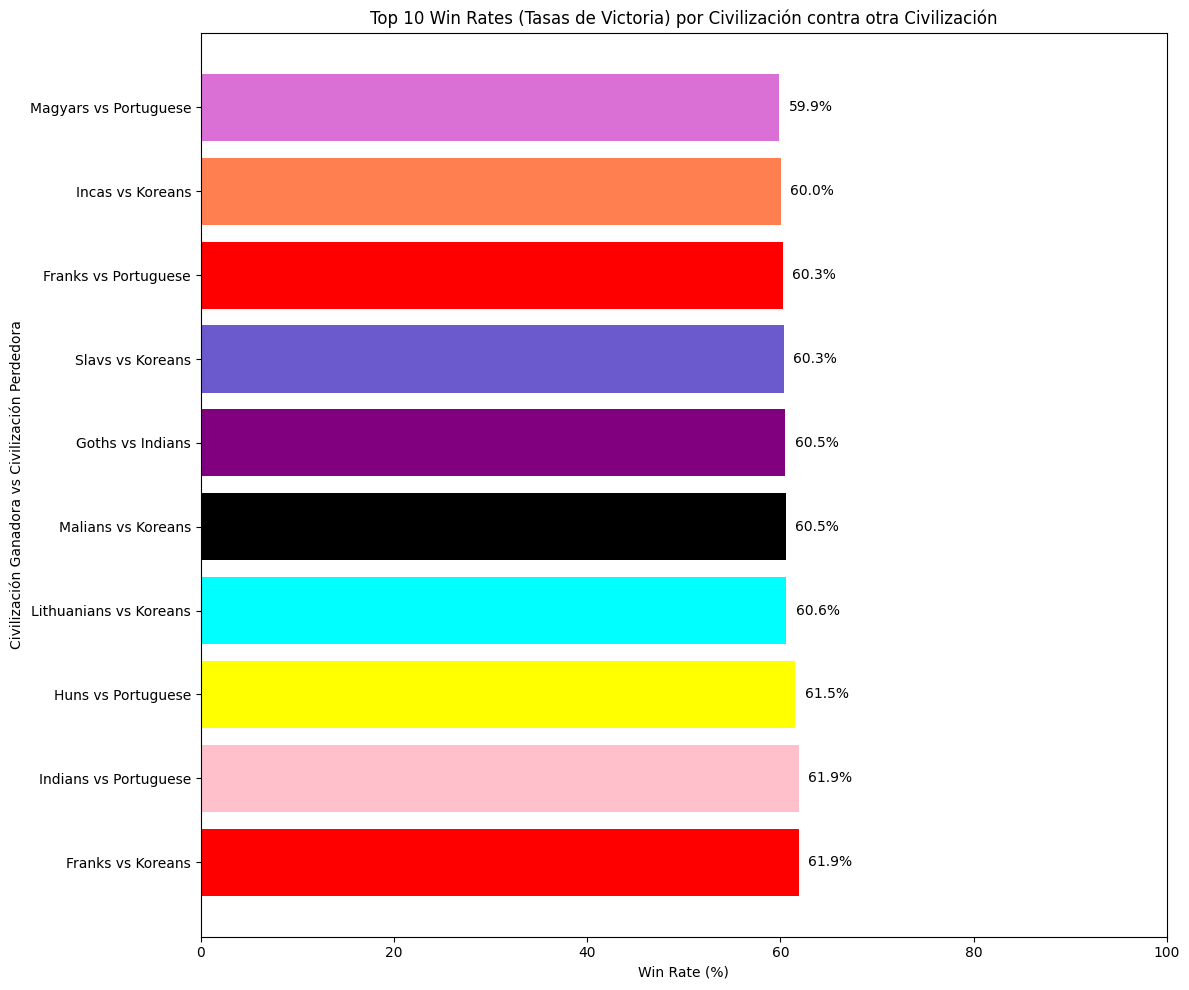

In [61]:
plt.figure(figsize=(12, 10))
bars = plt.barh(
    top_50_resultados['civilizacion'] + " vs " + top_50_resultados['oponente'],
    top_50_resultados['winrate_percent'],
    color=[colores_civilizaciones[civ] for civ in top_50_resultados['civilizacion']]
)

plt.ylabel('Civilización Ganadora vs Civilización Perdedora')
plt.xlabel('Win Rate (%)')
plt.title('Top 10 Win Rates (Tasas de Victoria) por Civilización contra otra Civilización')
plt.xlim(0, 100)

for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1, bar.get_y() + bar.get_height() / 2, f'{round(xval, 1)}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()


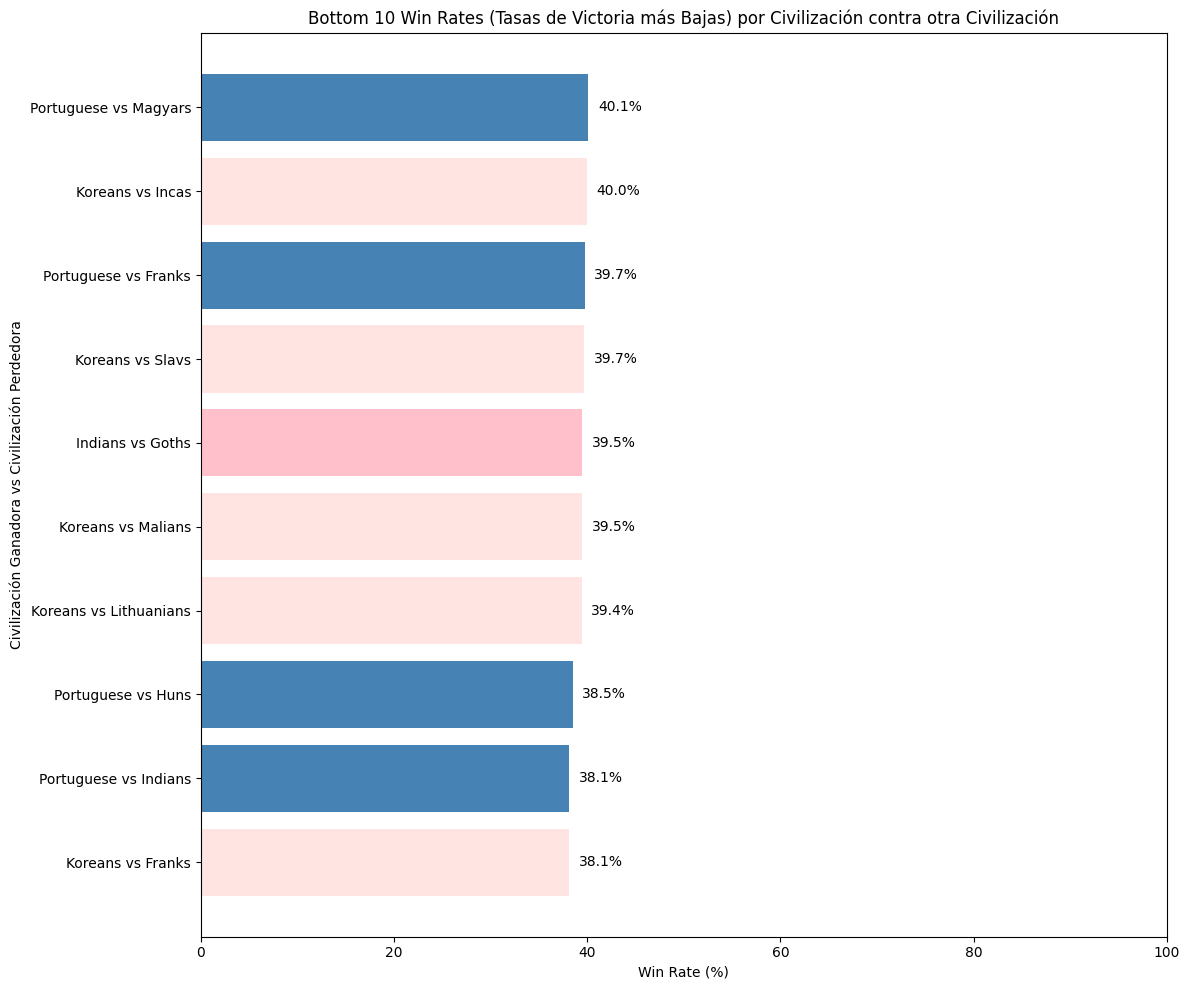

In [93]:
resultados_finales_df_ordenado_bajo = resultados_finales_df.sort_values(by='winrate_percent', ascending=True)
bottom_10_resultados = resultados_finales_df_ordenado_bajo.head(10)

plt.figure(figsize=(12, 10))
bars = plt.barh(
    bottom_10_resultados['civilizacion'] + " vs " + bottom_10_resultados['oponente'],
    bottom_10_resultados['winrate_percent'],
    color=[colores_civilizaciones.get(civ, 'red') for civ in bottom_10_resultados['civilizacion']]
)

plt.ylabel('Civilización Ganadora vs Civilización Perdedora')
plt.xlabel('Win Rate (%)')
plt.title('Bottom 10 Win Rates (Tasas de Victoria más Bajas) por Civilización contra otra Civilización')
plt.xlim(0, 100)

for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1, bar.get_y() + bar.get_height() / 2, f'{round(xval, 1)}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()


**Como podemos ver en el gráfico de barras hay nueve (9) civilizaciones con un winrate mayor o igual a 60%, por lo cual tendría posiblemente una mayor ventaja a la otra civilización solo por enfrentarse a esa, ocupando el ejemplo de los Franks vs Koreans, los Franks tienen un 23.8% más de probabilidades de ganar que los Koreans, esto solo por ser los Franks y Koreans, ya que podemos asumir que los Franks son el counter de los Koreans, esto puede ser por múltiples factores como las tropas que pueden hacer un mayor daño o tienen una ventaja contra éstos, por lo que considerarems la hipótesis como correcta, hay una o más civilizaciones que son counter de otras.**

## ¿En los distintos rangos cambian los winrates de las civilizaciones?

Para el primer bloque de los dos que se ocuparán (Sin contar los otros dos que serán para graficar los resultados) se realizará un filtro para obtener los resultados entre los 500 y 1500 ratings. Se hace el conteo del número de victorias y derrotas para cada combinación, se renombran las columnas y se combinan los datos, se hace el calculo del winrate y se renombran nuevamente las columnas, finalmente se ordena la columna winrate en porcentaje mayor a menor.

In [100]:
filtro_rating = particion_final[
    (particion_final['promedio_rating'] >= 500) &
    (particion_final['promedio_rating'] <= 1500)
]

victorias = filtro_rating.groupby(['civilizacion_win', 'civilizacion_lose']).size().reset_index(name='victorias')
derrotas = filtro_rating.groupby(['civilizacion_lose', 'civilizacion_win']).size().reset_index(name='derrotas')

victorias.rename(columns={'civilizacion_win': 'civilizacion', 'civilizacion_lose': 'oponente'}, inplace=True)
derrotas.rename(columns={'civilizacion_lose': 'civilizacion', 'civilizacion_win': 'oponente'}, inplace=True)

winrate_df_1500 = pd.merge(victorias, derrotas, on=['civilizacion', 'oponente'], how='outer').fillna(0)
winrate_df_1500['total_juegos'] = winrate_df_1500['victorias'] + winrate_df_1500['derrotas']
winrate_df_1500['winrate'] = winrate_df_1500['victorias'] / winrate_df_1500['total_juegos']
winrate_df_1500['winrate_percent'] = winrate_df_1500['winrate'] * 100
winrate_df_1500.columns = ['Civilización', 'Oponente', 'Victorias', 'Derrotas', 'Total Juegos', 'Win Rate', 'Win Rate (%)']
winrate_df_1500 = winrate_df_1500.sort_values(by='Win Rate (%)', ascending=False)

Se realiza el mismo procedimiento pero para las partidas que se encuentren en un rating de entre 500 y 1500.

In [101]:
filtro_rating = particion_final[
    (particion_final['promedio_rating'] >= 1500) &
    (particion_final['promedio_rating'] <= 2500)
]

victorias = filtro_rating.groupby(['civilizacion_win', 'civilizacion_lose']).size().reset_index(name='victorias')
derrotas = filtro_rating.groupby(['civilizacion_lose', 'civilizacion_win']).size().reset_index(name='derrotas')

victorias.rename(columns={'civilizacion_win': 'civilizacion', 'civilizacion_lose': 'oponente'}, inplace=True)
derrotas.rename(columns={'civilizacion_lose': 'civilizacion', 'civilizacion_win': 'oponente'}, inplace=True)

winrate_df_2500 = pd.merge(victorias, derrotas, on=['civilizacion', 'oponente'], how='outer').fillna(0)
winrate_df_2500['total_juegos'] = winrate_df_2500['victorias'] + winrate_df_2500['derrotas']
winrate_df_2500['winrate'] = winrate_df_2500['victorias'] / winrate_df_2500['total_juegos']
winrate_df_2500['winrate_percent'] = winrate_df_2500['winrate'] * 100
winrate_df_2500.columns = ['Civilización', 'Oponente', 'Victorias', 'Derrotas', 'Total Juegos', 'Win Rate', 'Win Rate (%)']
winrate_df_2500 = winrate_df_2500.sort_values(by='Win Rate (%)', ascending=False)

Se crea el gráfico para las partidas de entre 500 a 1500 de rating, mostrando las 10 civilizaciones con un mejor winrate.

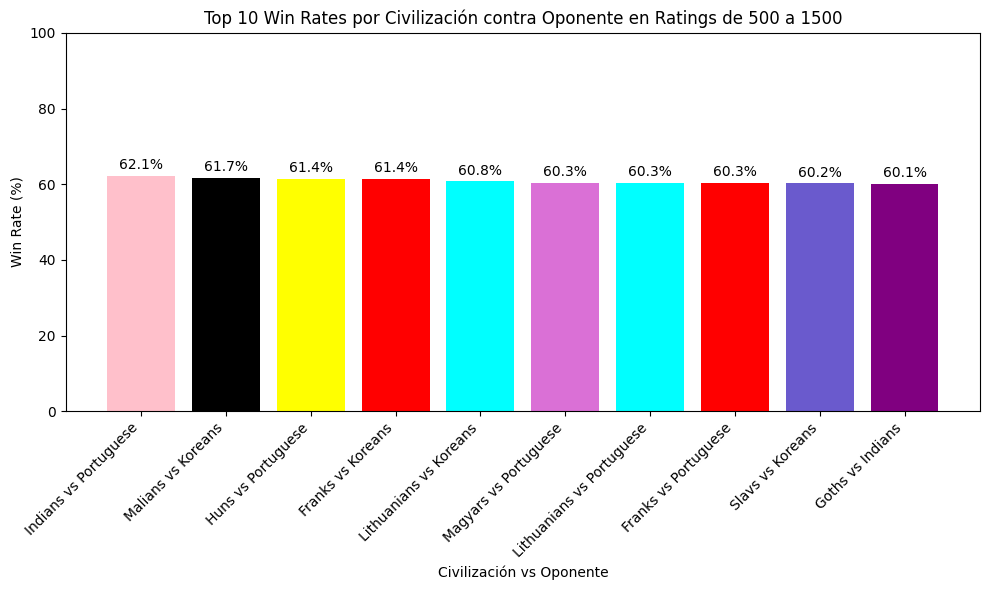

In [102]:
top_10_resultados = winrate_df_1500.head(10)
bar_colors = [colores_civilizaciones[civ] for civ in top_10_resultados['Civilización']]

plt.figure(figsize=(10, 6))
bars = plt.bar(
    top_10_resultados['Civilización'] + " vs " + top_10_resultados['Oponente'],
    top_10_resultados['Win Rate (%)'],
    color=bar_colors
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Civilización vs Oponente')
plt.ylabel('Win Rate (%)')
plt.title('Top 10 Win Rates por Civilización contra Oponente en Ratings de 500 a 1500')
plt.ylim(0, 100)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{round(yval, 1)}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Se crea el gráfico para las partidas de entre 1500 a 2500 de rating, mostrando las 10 civilizaciones con un mejor winrate.

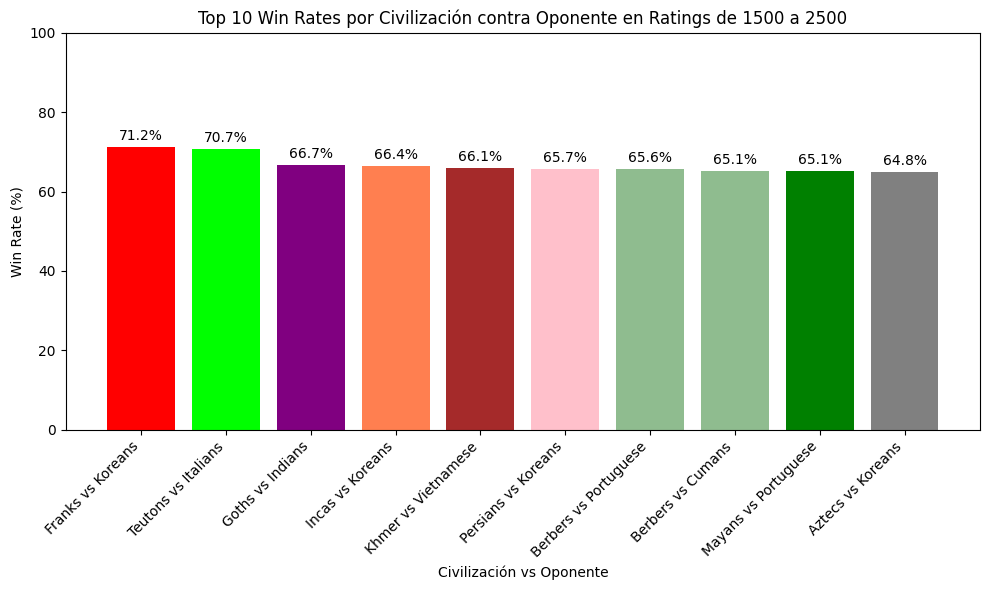

In [104]:
top_10_resultados = winrate_df_2500.head(10)
bar_colors = [colores_civilizaciones[civ] for civ in top_10_resultados['Civilización']]

plt.figure(figsize=(10, 6))
bars = plt.bar(
    top_10_resultados['Civilización'] + " vs " + top_10_resultados['Oponente'],
    top_10_resultados['Win Rate (%)'],
    color=bar_colors
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Civilización vs Oponente')
plt.ylabel('Win Rate (%)')
plt.title('Top 10 Win Rates por Civilización contra Oponente en Ratings de 1500 a 2500')
plt.ylim(0, 100)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{round(yval, 1)}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Como podemos ver en los gráficos de barras entre las diez (10) civilizaciones con su respectivo winrate, se repiten 2 enfrentamientos entre los rangos, Franks vs Koreans que entre los rangos 500 a 1500 (rating) tienen un winrate de 61.4%, cuando entre los rangos 1500 a 2500 (rating) tienen un winrate del 71.2%, siendo mayor en los rangos más altos. Pasando al otro dato que se puede ver entre los graficos están los Goths vs Indians, donde entre los rangos 500 a 1500 tienen un winrate del 60.1% y entre los rangos 1500 a 2500 tienen un winrate del 66.7%.

Podemos asumir viendo el resto de datos que entre mayor sea el rango se encontrará una diferencia entre el winrate o una mayor ventaja de ciertas civilizaciones al tener un enfrentamiento entre otras, donde entre los Franks vs Koreans la diferencia del winrate es del 10.9%, por lo que tiene una mayor ventaja en los rangos superiores, por lo que podemos dar la hipótesis como correcta, hay al menos una civilización con un counter que tiene una diferencia mayor al 10%.**

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

## Fase 3: Data Preparation

## RATING A ENTERO

Se realiza la conversión ya que se trabajará con el promedio de éste y se necesita que sea un entero

In [5]:
aoe['rating'] = pd.to_numeric(aoe['rating'], errors='coerce')

Luego de pasar a entero la columna rating se puede obtener el promedio [Fase 2]

## LLenado de datos nulos

Función para sacar el promedio del rating por la partida y insertar el promedio de esa partida en las filas vacías. (Si el match es nulo no se puede rellenar ese dato) [Tarda aproximadamente 4min]

In [7]:
def fill_nulos_rating(row):
    if pd.isnull(row['rating']):
        if pd.isnull(row['match']):
            return row['rating']
        else:
            return promedio_rating_match.get(row['match'], row['rating'])
    else:
        return row['rating']

aoe['rating'] = aoe.apply(fill_nulos_rating, axis=1)

Ahora se debe pasar a la fase 2 para verificar si quedan valores nulos (VERIFICAR VALORES NULOS RATING) [Fase 2]

## ELIMINACIÓN DE LOS OTROS NAN

In [13]:
aoe_2 = aoe_2.dropna()

*Pasaremos una última verificación en la Fase 2 [Última verificación Nulos] [Fase 2]

## TRANSFORMACIÓN DE WINNER

Transformaremos la columna en enteros [0 y 1], al igual que verificaremos que la conversión haya sido exitosa.

In [20]:
aoe_2_sin_outliers['winner'] = aoe_2_sin_outliers['winner'].astype(int)

print(aoe_2_sin_outliers['winner'].unique())

[0 1]


<ipython-input-20-4141e50bcbc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aoe_2_sin_outliers['winner'] = aoe_2_sin_outliers['winner'].astype(int)


Con la transformación del Winner para más adelante pasaremos a la fase 2 para responder la primera pregunta, ¿Qué civilización es la más jugada? [Fase 2]

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.

## Fase 4: Modeling

### Regresión

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar tarea de regresión de datos orientado al caso entregado

### Clasificación



In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar tarea de clasificación de datos orientado al caso entregado

## Fase 5: Evaluation

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Evaluar con las métricas que corresponda los mejores modelos, explicar cual es mejor para cada tarea y por qué

## Fase 5: Deployment

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar despliegue del modelo